In [2]:
import pandas as pd
import numpy as np

# Plots (for your EDA cells)
import matplotlib.pyplot as plt
import seaborn as sns

# Models and tools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay


In [18]:
# Load the data (adjust filename if needed)
train = pd.read_csv(r"C:\Users\Kartikey\ml_project\data\smoking\train.csv")   # has 'smoking' column
test  = pd.read_csv(r"C:\Users\Kartikey\ml_project\data\smoking\test.csv")    # no 'smoking' column


In [19]:
# Basic info
print(train.shape)
print(train.dtypes)

# Peek at data
train.head()


(38984, 23)
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [21]:
# Simple numeric summary
train.describe()


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


**EDA**

In [27]:
sns.set(style="whitegrid")

train.shape, test.shape

# Glance at types and missing values
train.info()
train.isna().sum()

# Quick statistical summary of numeric features
train.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

,count,mean,std,min,25%,50%,75%,max
age,38984.0,44.127591,12.063564,20.0,40.0,40.0,55.0,85.0
height(cm),38984.0,164.689488,9.187507,130.0,160.0,165.0,170.0,190.0
weight(kg),38984.0,65.938718,12.896581,30.0,55.0,65.0,75.0,135.0
waist(cm),38984.0,82.062115,9.326798,51.0,76.0,82.0,88.0,129.0
eyesight(left),38984.0,1.014955,0.498527,0.1,0.8,1.0,1.2,9.9
eyesight(right),38984.0,1.008768,0.493813,0.1,0.8,1.0,1.2,9.9
hearing(left),38984.0,1.025369,0.157246,1.0,1.0,1.0,1.0,2.0
hearing(right),38984.0,1.026190,0.159703,1.0,1.0,1.0,1.0,2.0
systolic,38984.0,121.475631,13.643521,71.0,112.0,120.0,130.0,233.0
relaxation,38984.0,75.994408,9.658734,40.0,70.0,76.0,82.0,146.0


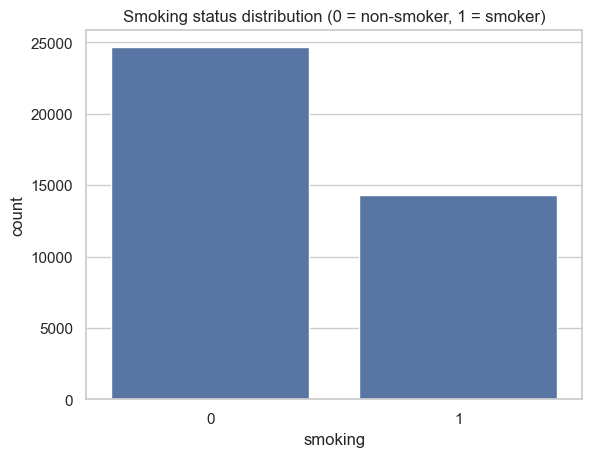

smoking
0    0.632721
1    0.367279
Name: proportion, dtype: float64


In [28]:
target_col = "smoking"  # adjust if needed

sns.countplot(x=target_col, data=train)
plt.title("Smoking status distribution (0 = non-smoker, 1 = smoker)")
plt.show()

print(train[target_col].value_counts(normalize=True))


This shows whether the dataset is balanced or skewed towards smokers or non‑smokers, which matters for F1 vs accuracy later.

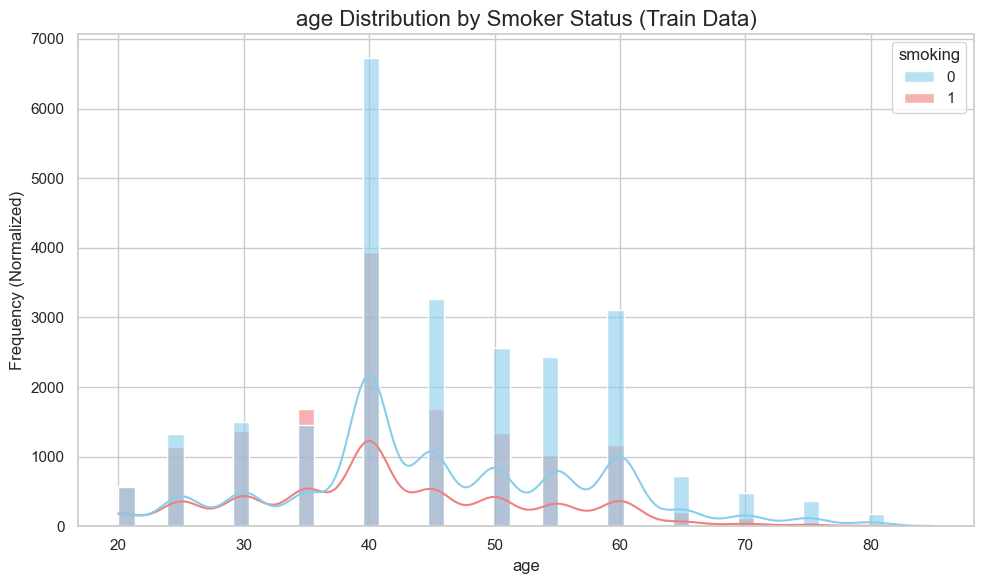

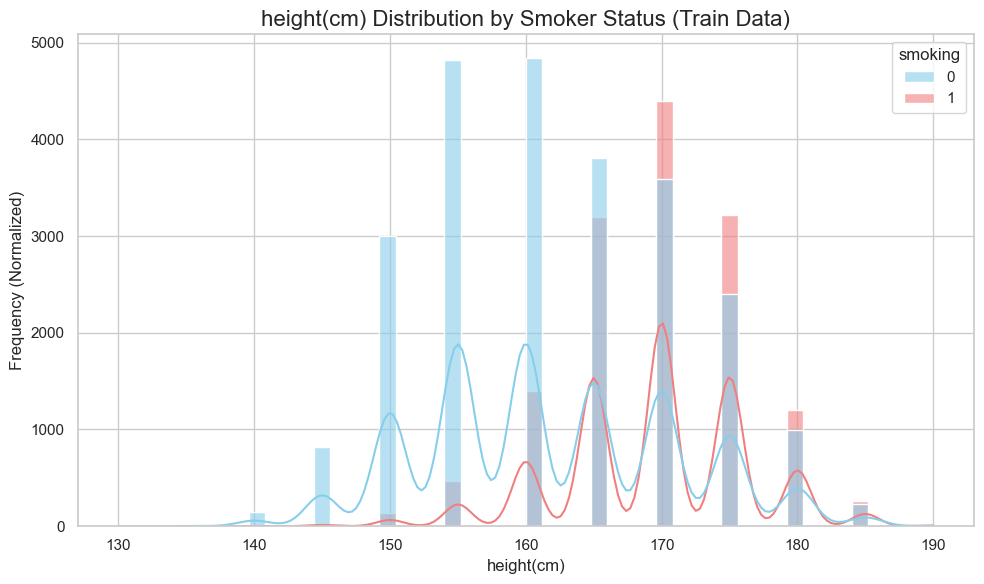

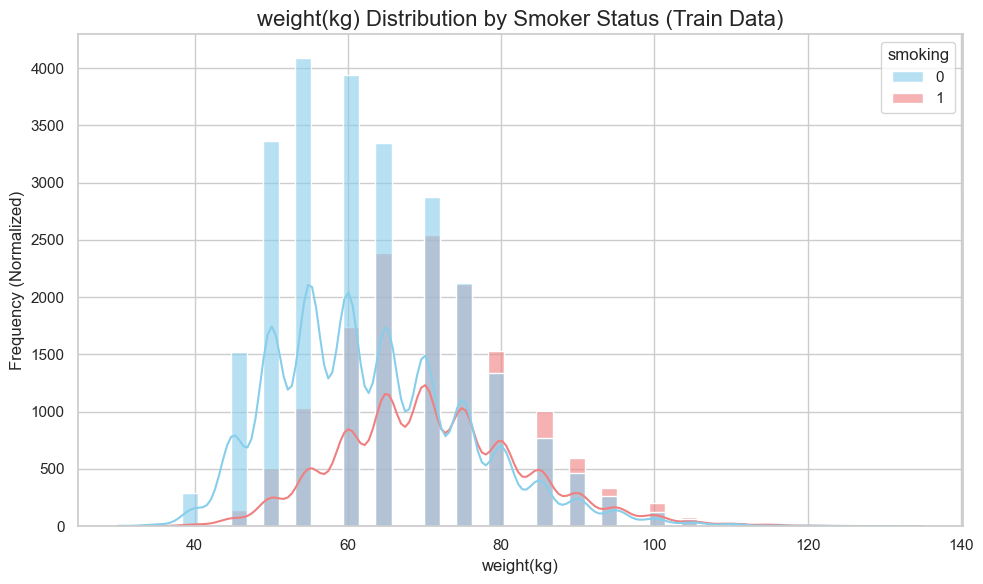

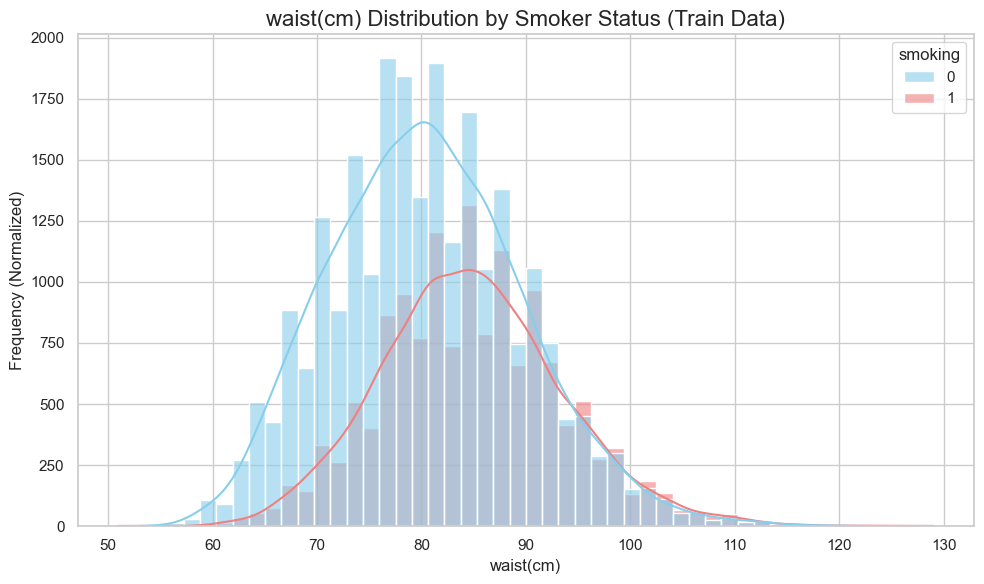

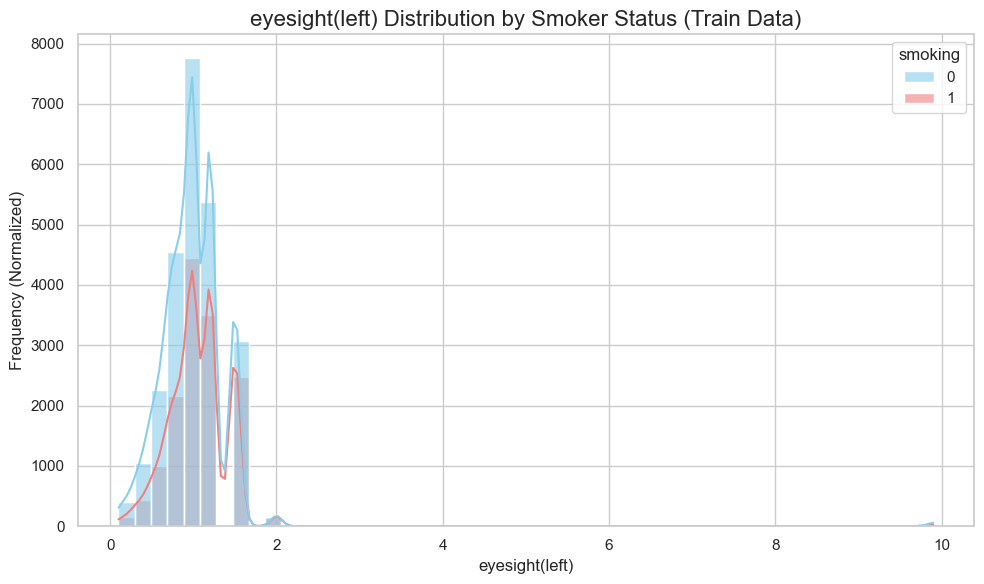

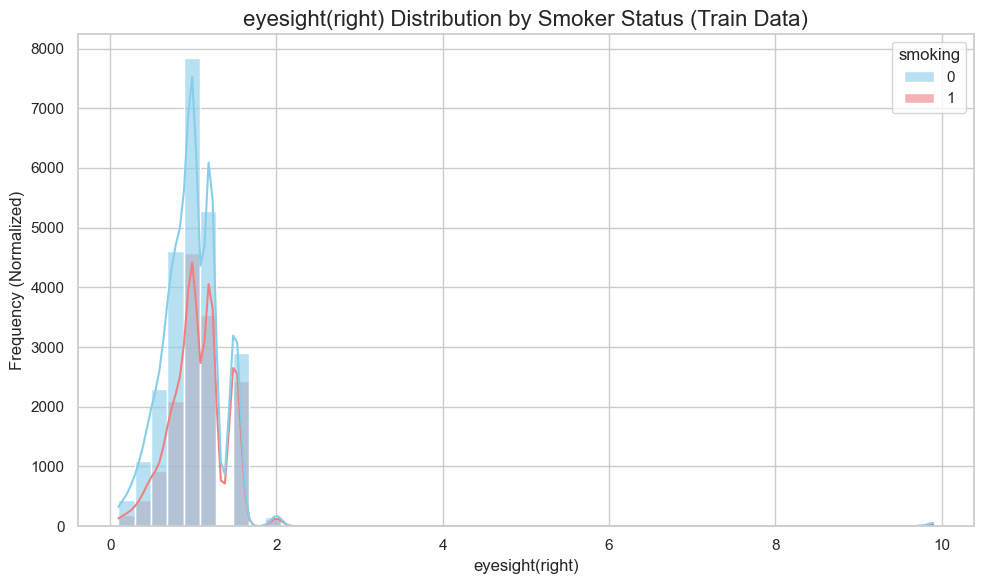

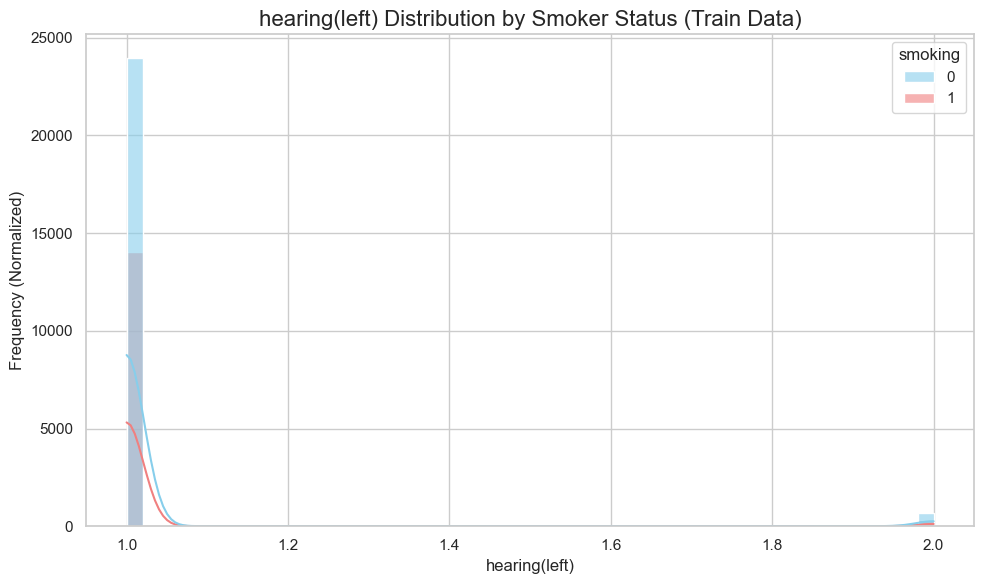

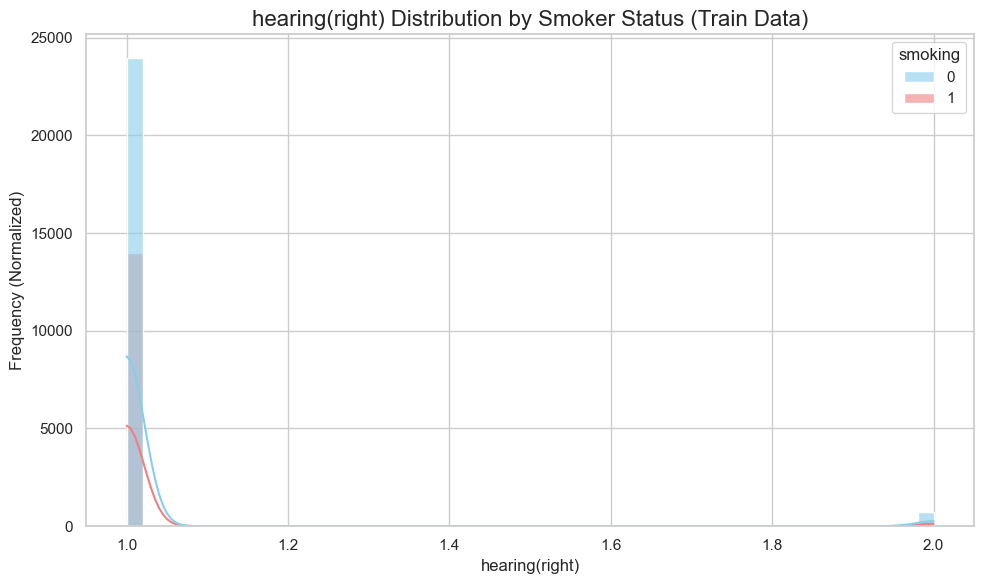

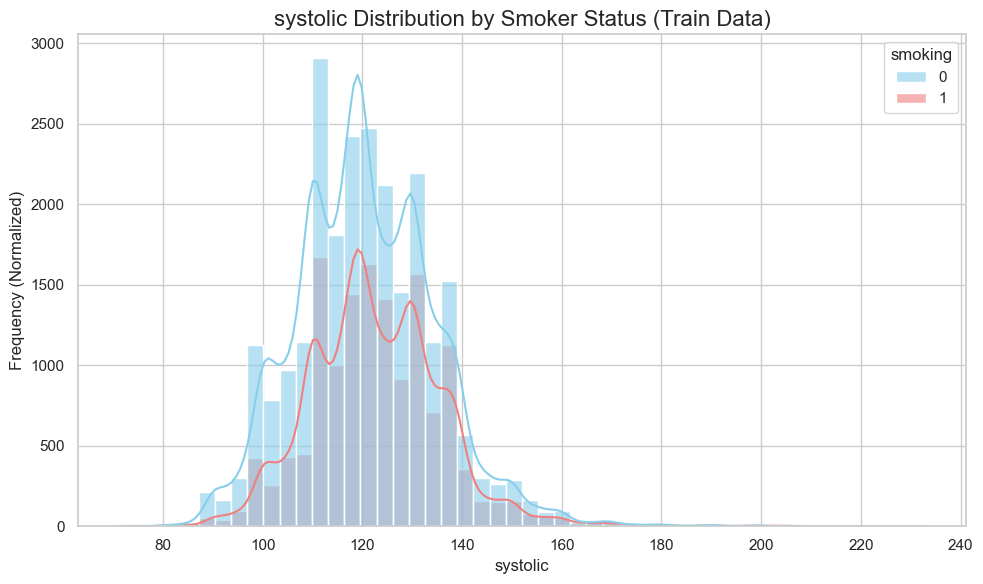

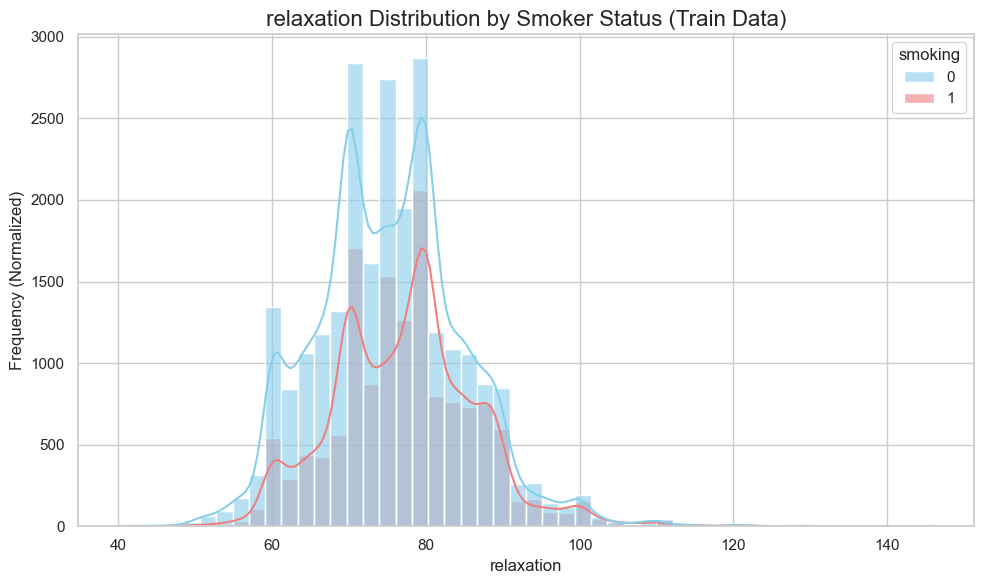

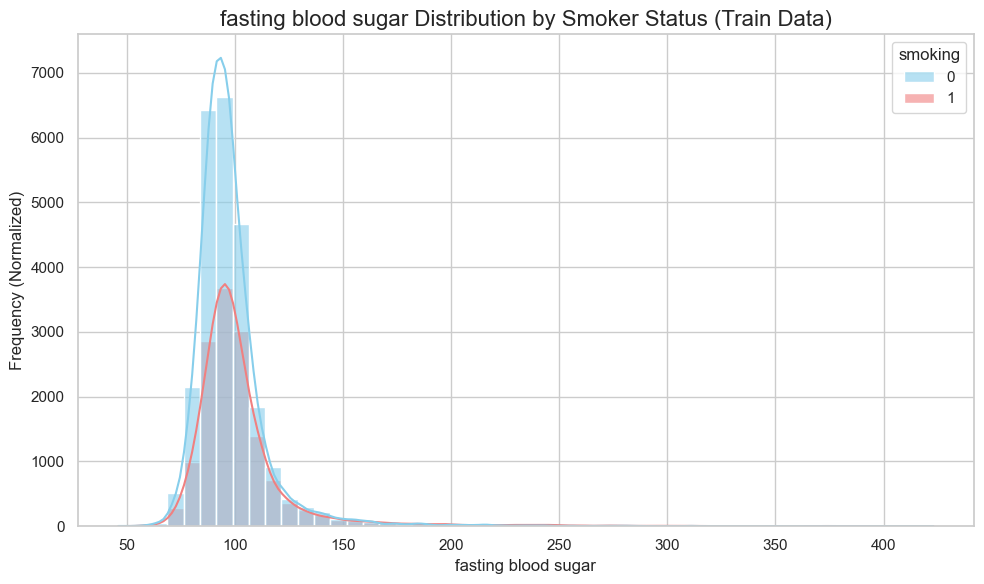

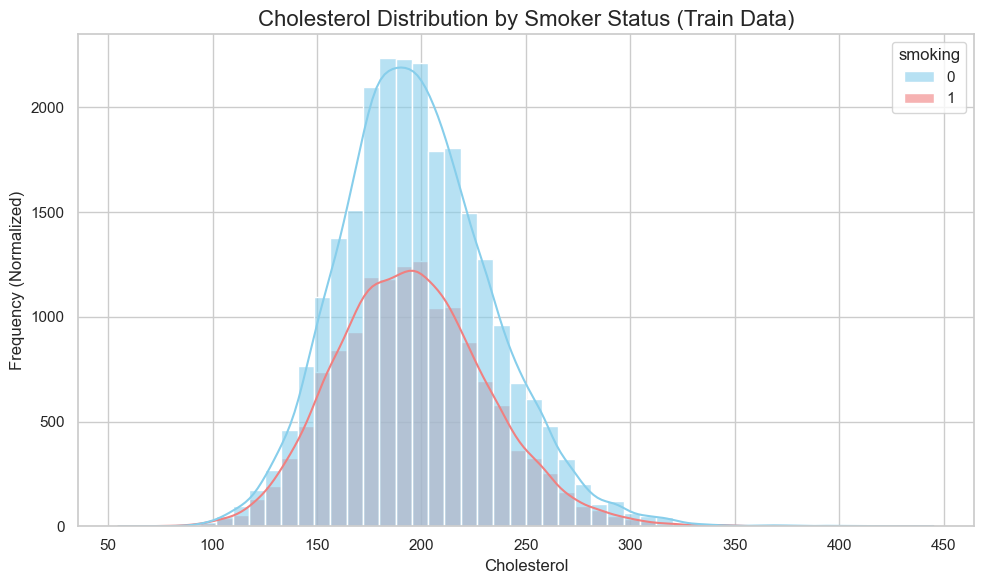

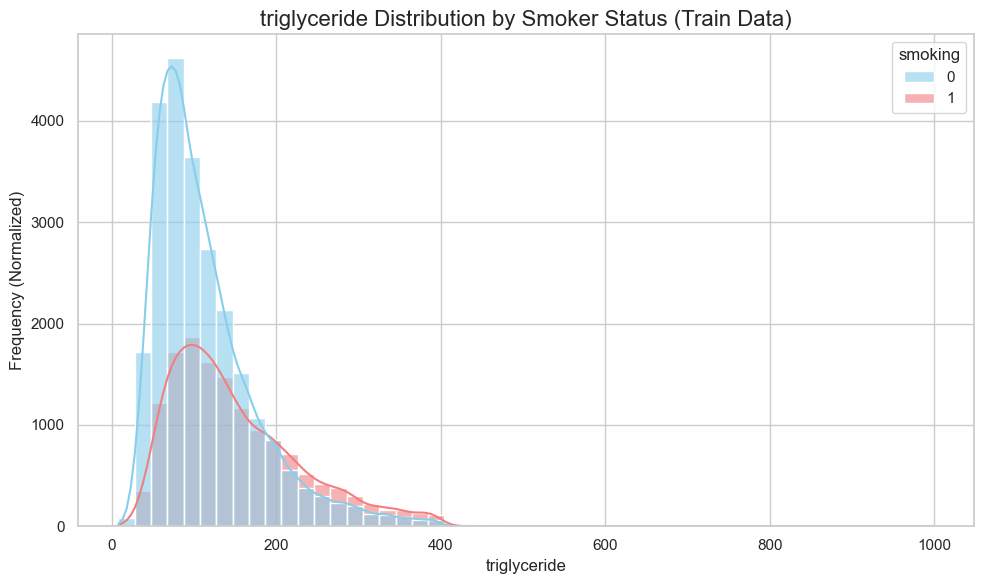

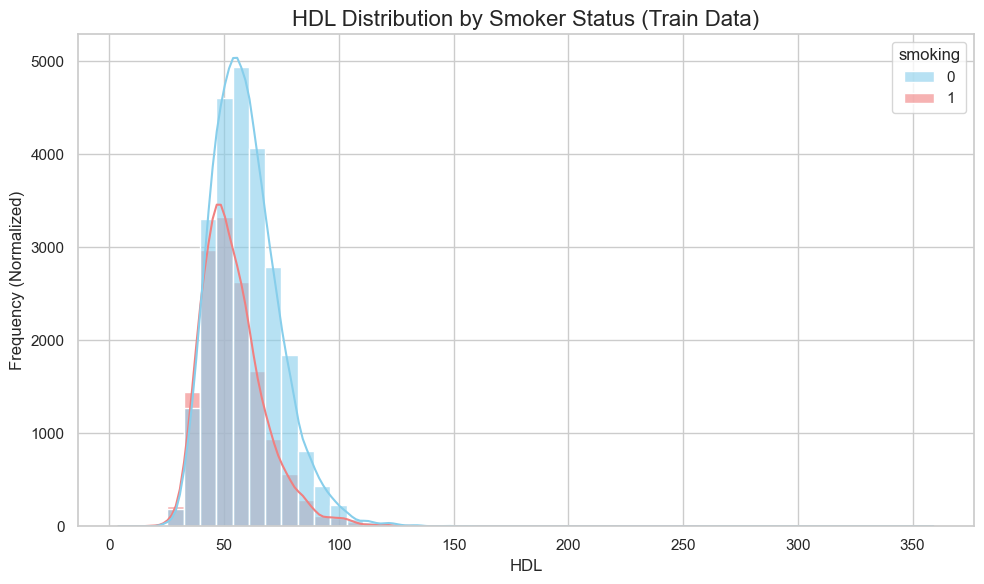

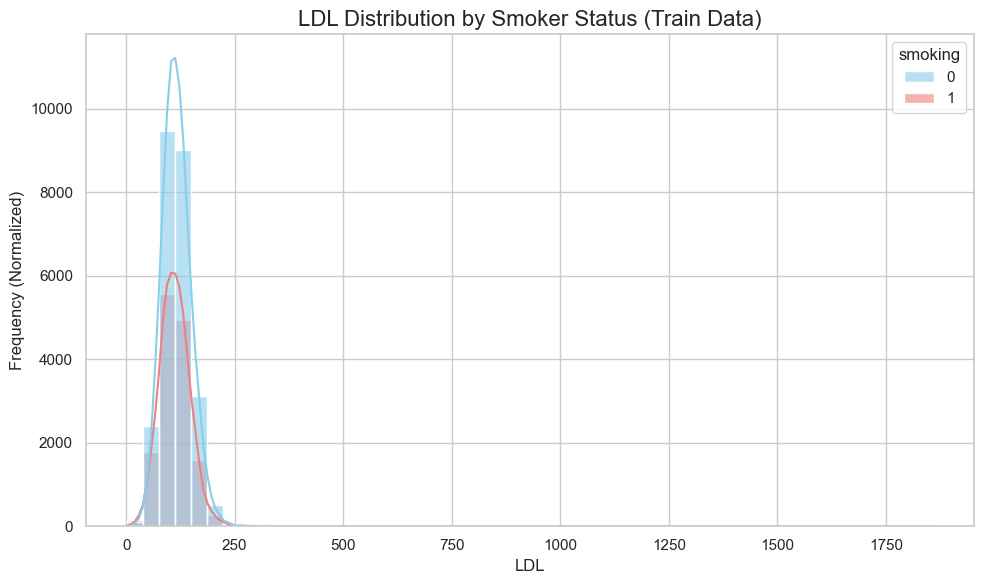

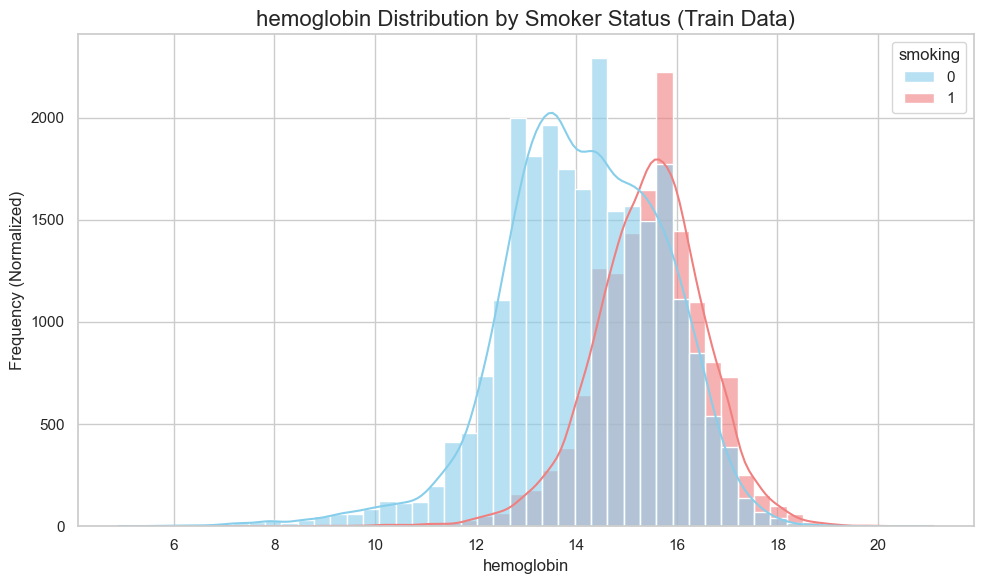

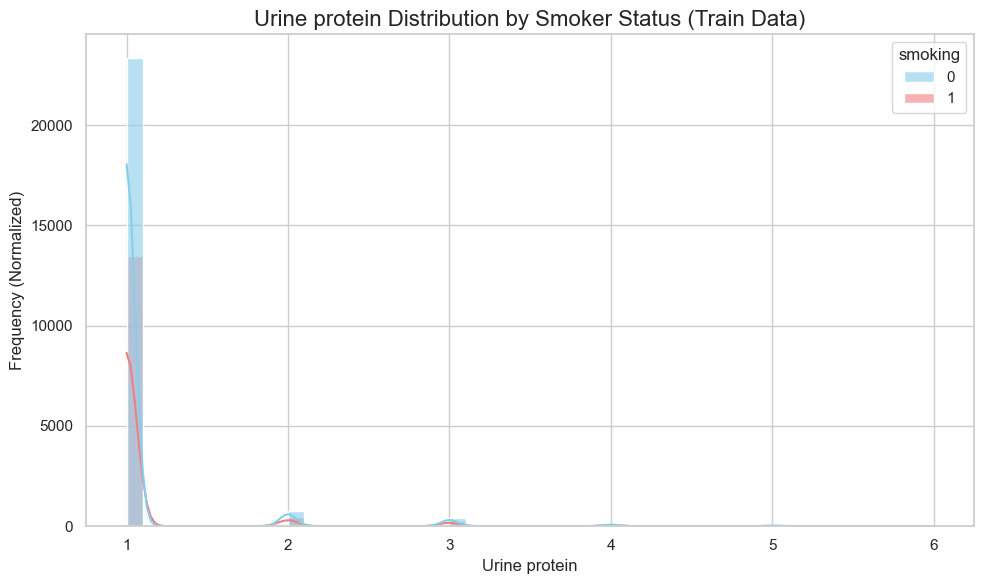

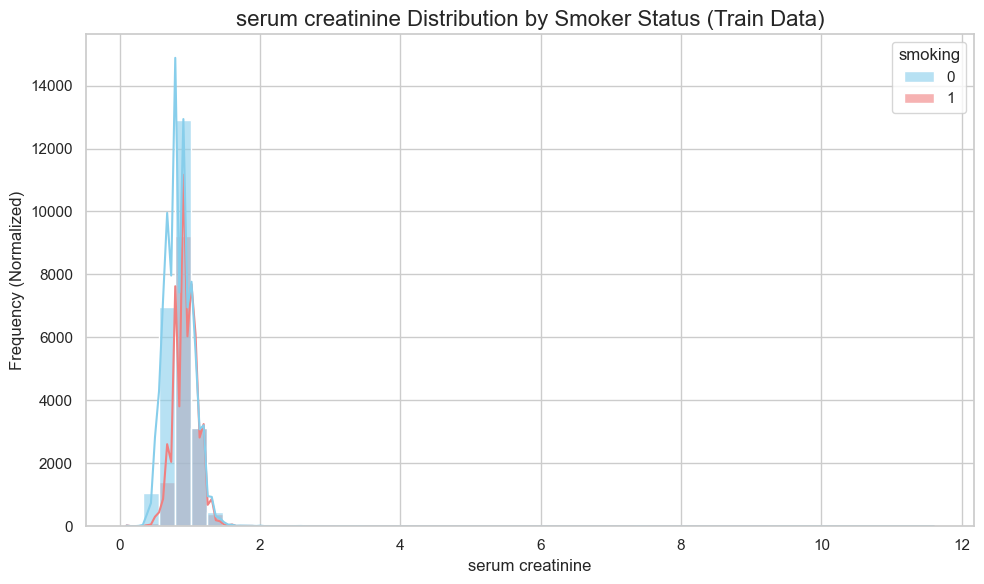

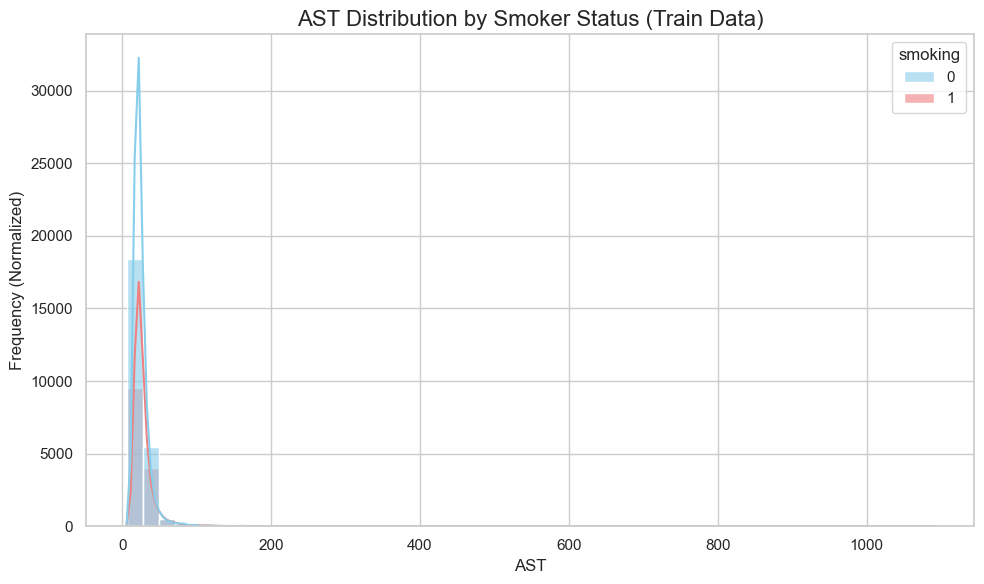

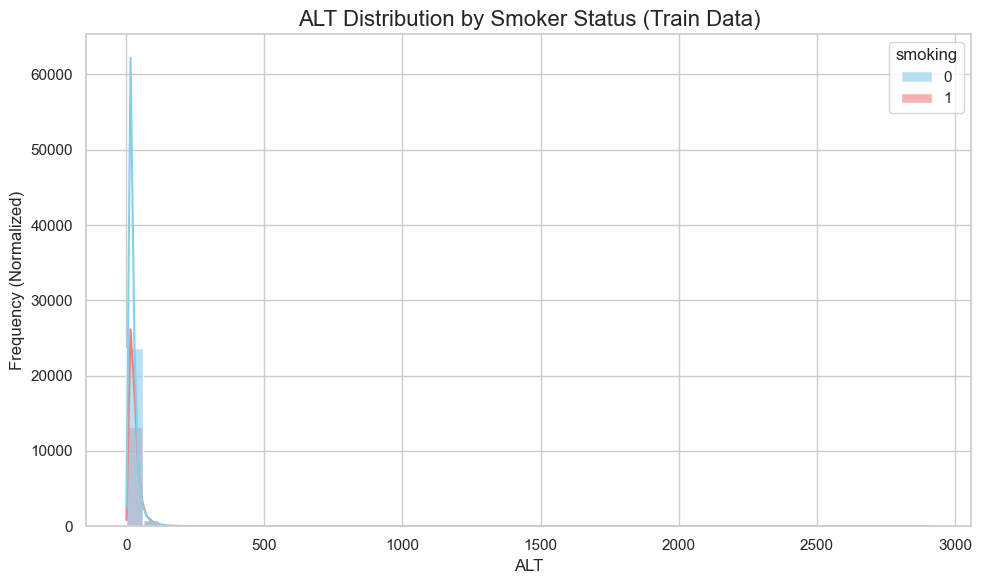

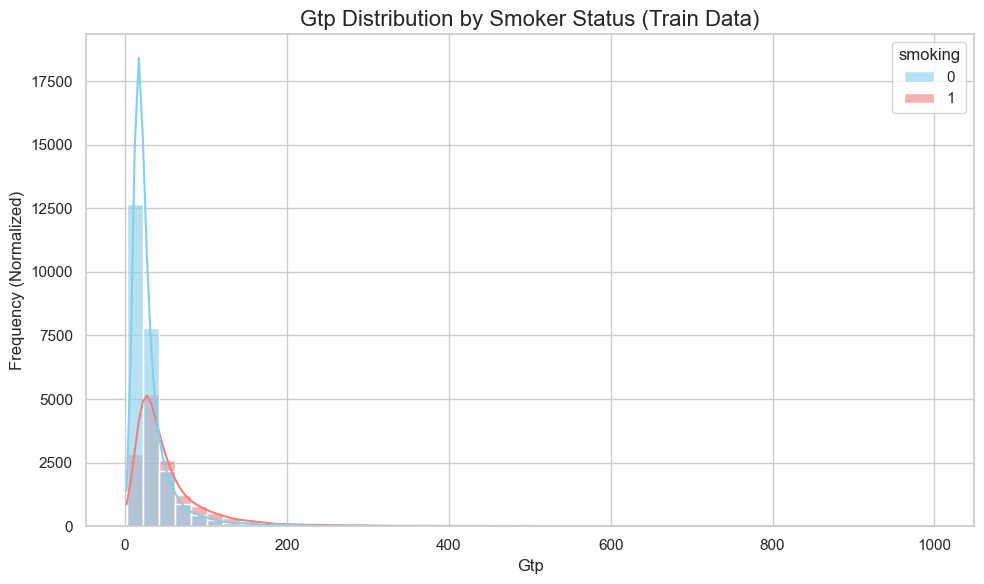

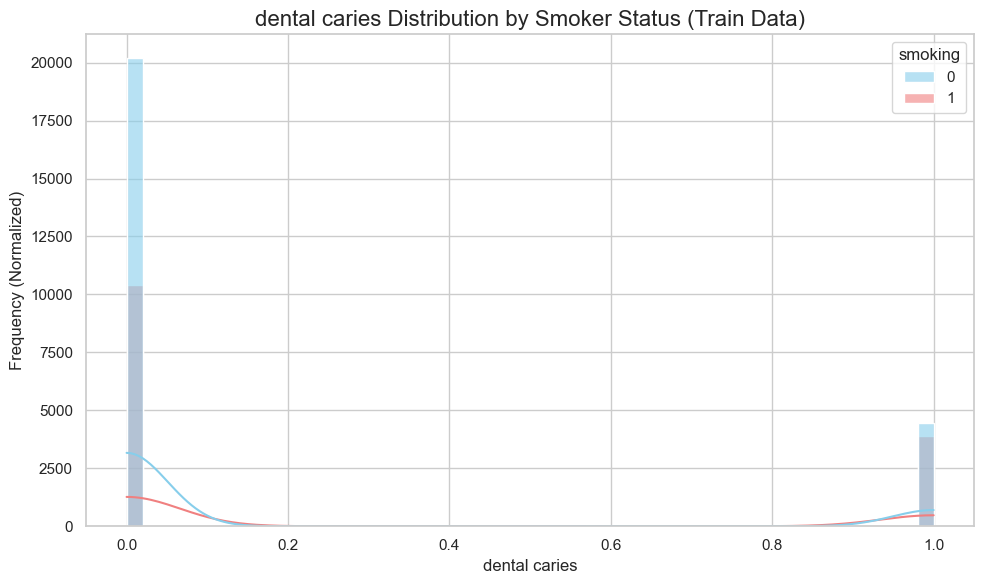

In [36]:
features_to_plot = train.columns.drop(['smoking']).tolist()

sns.set_style("whitegrid")

# （smoking=0 と smoking=1 ）
for feat in features_to_plot:
    plt.figure(figsize=(10, 6))

    sns.histplot(data=train, x=feat, hue='smoking',
                 bins=50, 
                 kde=True,
                 palette={0: 'skyblue', 1: 'lightcoral'}, # smoking=0、smoking=1
                 common_norm=False, #（smoking=0と1）
                 alpha=0.6) 

    plt.title(f'{feat} Distribution by Smoker Status (Train Data)', fontsize=16)
    plt.xlabel(feat, fontsize=12)
    plt.ylabel('Frequency (Normalized)', fontsize=12) # common_norm=False 
    # plt.legend(title='Smoking Status', labels=['Non-Smoker (0)', 'Smoker (1)']) 

    plt.tight_layout() 
    plt.show()

Separate numeric features

In [29]:
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != target_col]

len(numeric_cols), numeric_cols[:10]


(22,
 ['age',
  'height(cm)',
  'weight(kg)',
  'waist(cm)',
  'eyesight(left)',
  'eyesight(right)',
  'hearing(left)',
  'hearing(right)',
  'systolic',
  'relaxation'])

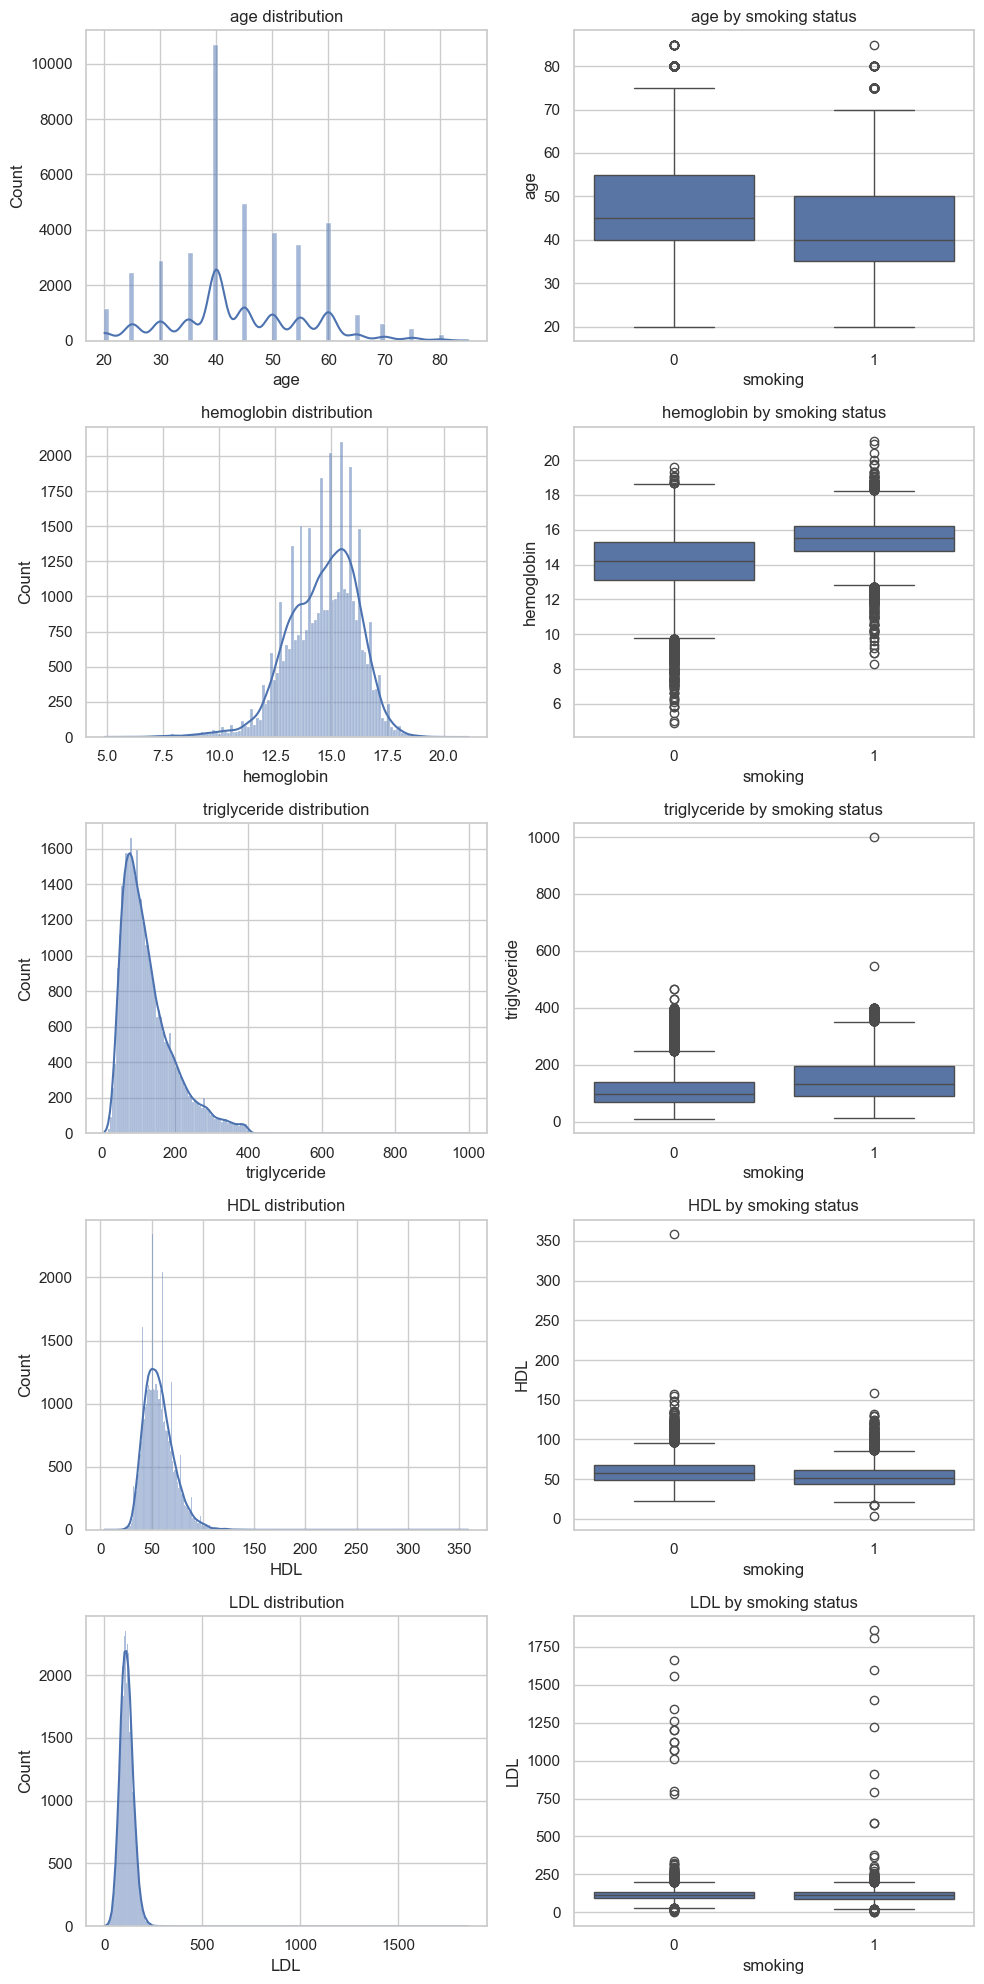

In [30]:
key_features = ["age", "hemoglobin", "cholesterol", "triglyceride", "HDL", "LDL", "GTP"]
key_features = [f for f in key_features if f in numeric_cols]

fig, axes = plt.subplots(len(key_features), 2, figsize=(10, 4*len(key_features)))

for i, col in enumerate(key_features):
    # Overall histogram
    sns.histplot(train[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} distribution")

    # By class (smoker vs non-smoker)
    sns.boxplot(x=target_col, y=col, data=train, ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} by smoking status")

plt.tight_layout()
plt.show()


Correlation heatmap and “important” correlated features

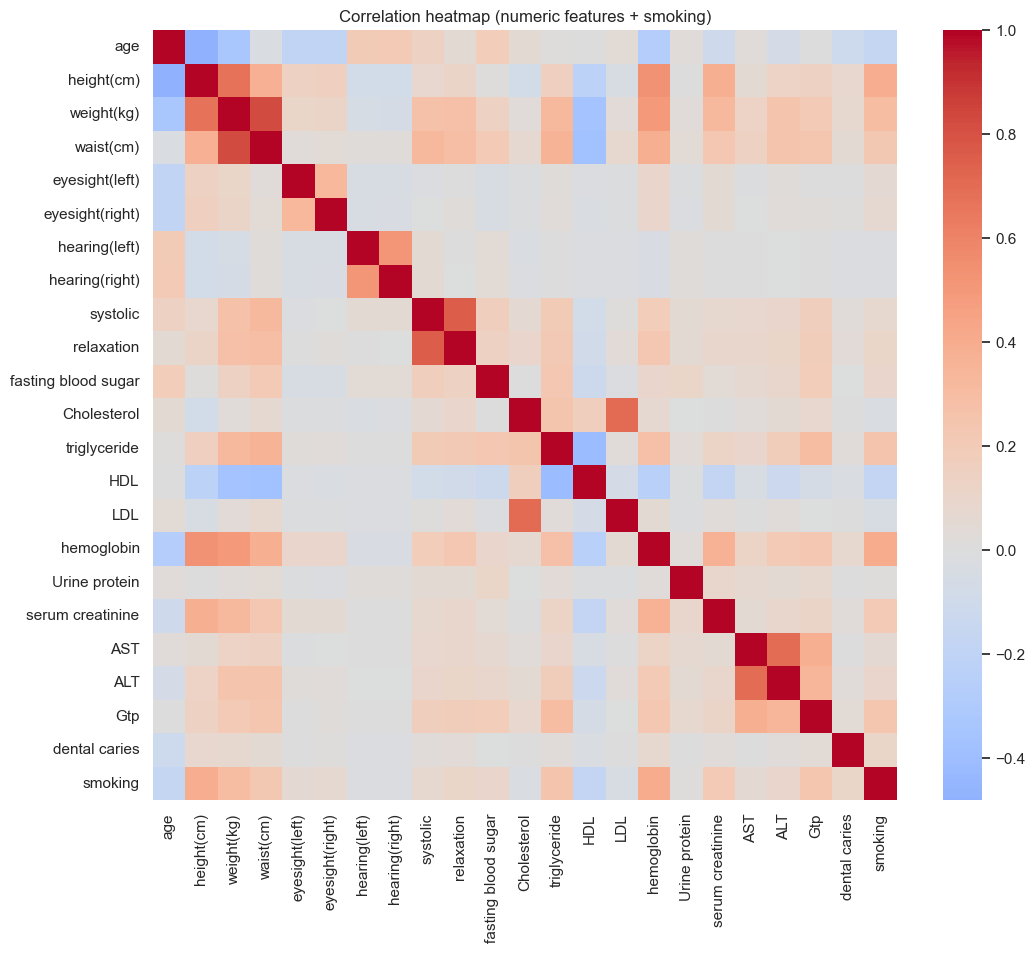

In [31]:
corr = train[numeric_cols + [target_col]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation heatmap (numeric features + smoking)")
plt.show()


To focus on features most related to smoking:

In [32]:
corr_with_target = corr[target_col].drop(target_col).sort_values(ascending=False)
corr_with_target


hemoglobin             0.401206
height(cm)             0.394314
weight(kg)             0.299347
triglyceride           0.251057
Gtp                    0.240274
waist(cm)              0.223359
serum creatinine       0.212473
dental caries          0.107601
relaxation             0.103663
fasting blood sugar    0.099908
ALT                    0.098615
systolic               0.070176
eyesight(right)        0.064587
AST                    0.062834
eyesight(left)         0.059409
Urine protein          0.013653
hearing(right)        -0.018990
hearing(left)         -0.022077
Cholesterol           -0.027493
LDL                   -0.041627
age                   -0.166268
HDL                   -0.179509
Name: smoking, dtype: float64

2D projections to check linear separability

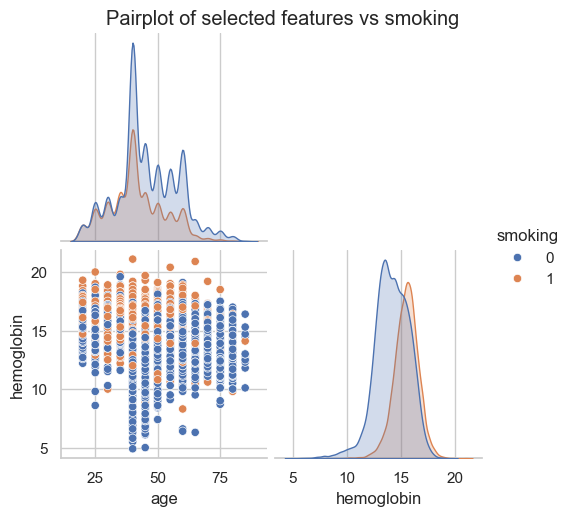

In [33]:
# Choose a small subset of features for pairplot (otherwise it's too slow / messy)
pairplot_features = ["age", "hemoglobin", "cholesterol", "GTP", target_col]
pairplot_features = [f for f in pairplot_features if f in train.columns]

sns.pairplot(train[pairplot_features], hue=target_col, diag_kind="kde", corner=True)
plt.suptitle("Pairplot of selected features vs smoking", y=1.02)
plt.show()


Simple dimensionality reduction view (PCA scatter)

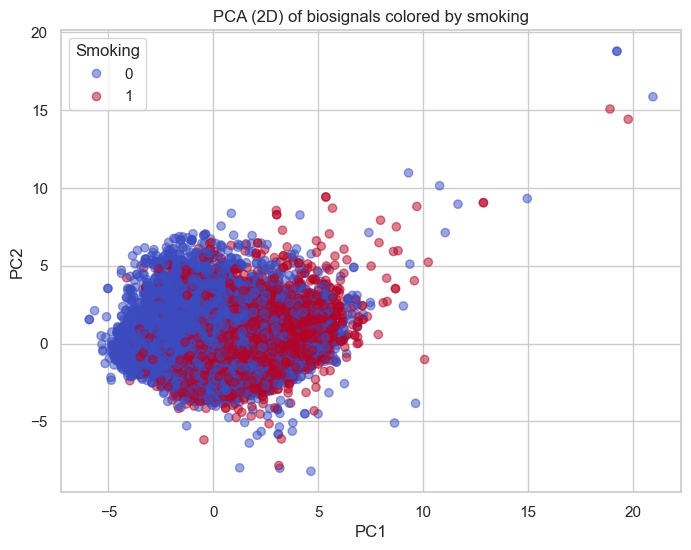

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = train[numeric_cols].values
y = train[target_col].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D) of biosignals colored by smoking")
plt.legend(*scatter.legend_elements(), title="Smoking")
plt.show()


Interpretation:


*   If clusters of smokers vs non‑smokers are reasonably separated in PCA space, linear models may already do well.
*   If they are heavily entangled, the dataset likely has non‑linear structure, so SVM (RBF) and MLP can gain an advantage.



Quick feature importance proxy with a simple model

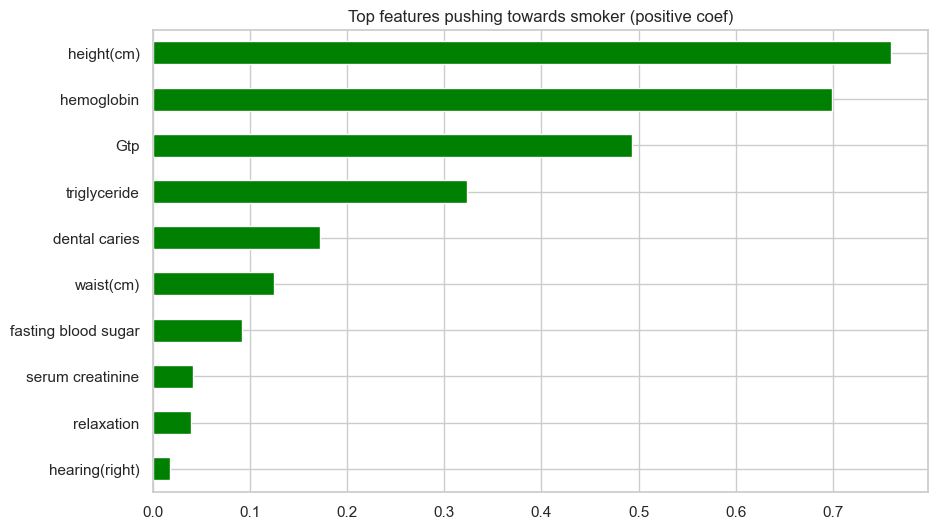

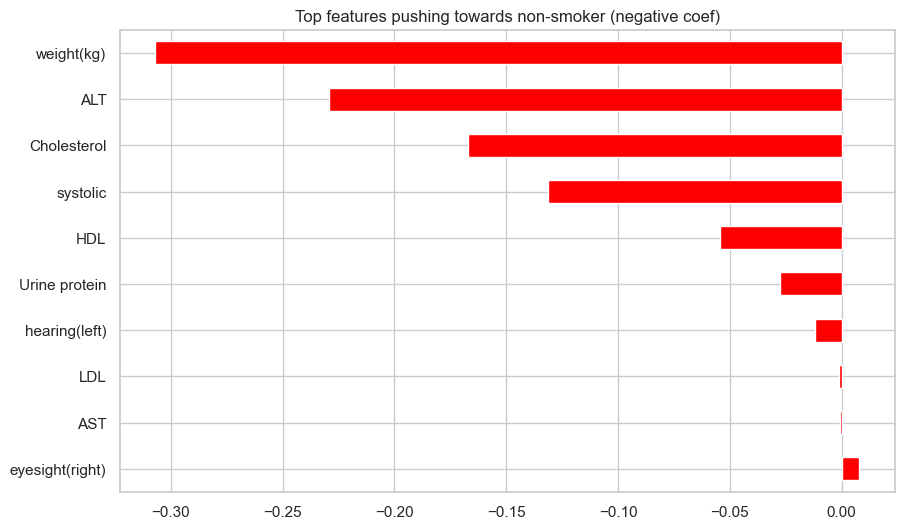

In [35]:
from sklearn.linear_model import LogisticRegression

log_scaler = StandardScaler()
X_scaled = log_scaler.fit_transform(train[numeric_cols])

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_scaled, y)

feature_importance = pd.Series(log_reg.coef_[0], index=numeric_cols)
feature_importance.sort_values(ascending=False).head(15), feature_importance.sort_values().head(15)

top_pos = feature_importance.sort_values(ascending=False).head(10)
top_neg = feature_importance.sort_values().head(10)

plt.figure(figsize=(10, 6))
top_pos.plot(kind="barh", color="green")
plt.title("Top features pushing towards smoker (positive coef)")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
top_neg.plot(kind="barh", color="red")
plt.title("Top features pushing towards non-smoker (negative coef)")
plt.gca().invert_yaxis()
plt.show()



As we can see, from the plots and PCA, that the data is not linearly seperable, so we'll focus more on SVM with Kernels and MLP, using Logistic regression as a base for feature importance only.